<a href="https://colab.research.google.com/github/prasunamishra/5CS037/blob/main/Week2_Prasuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Problem 1 - Data Read, Write and Inspect:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#1. Load the provided dataset and import in pandas DataFrame.
df=pd.read_csv("/content/sample_data/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
#2. Check info of the DataFrame and identify following:
#(a) columns with dtypes=object
df.info()
object_cols = df.select_dtypes(include="object").columns
print(object_cols)

#(b) unique values of those columns.
for col in object_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

#(c) check for the total number of null values in each column.
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pou

In [9]:
#3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in”.csv” with name ”banknumericdata.csv”

df_numeric = df.select_dtypes(exclude="object")
print(df_numeric.head())
df_numeric.to_csv("banknumericdata.csv", index=False)


   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


In [15]:
#4. Read ”banknumericdata.csv” and Find the summary statistics.
df_num = pd.read_csv("banknumericdata.csv")
df_num.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [25]:
#Problem 2 - Data Imputations:
#Complete all the following Task:
#• Dataset for the Task: "medical_student.csv"
# 1. Load the provided dataset and import in pandas DataFrame.

df = pd.read_csv("/content/sample_data/medical_students_dataset.csv")
df.head()



,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [22]:
# 2. Check info of the DataFrame and identify column with missing (null) values.
df.info()
df.isnull().sum()

# 3. For the column with missing values fill the values using various techniques we discussed above. Try
# to explain why did you select the particular methods for particular column.
print(df.columns)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype != 'object':
            # numeric
            df[col] = df[col].fillna(df[col].median())
        else:
            # categorical
            df[col] = df[col].fillna(df[col].mode()[0])

#df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0]) # mode imputation
#print(df.isnull().sum())
# 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
# {Hint: dataset.duplicated.sum()}
df.duplicated().sum()
df = df.drop_duplicates()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'conta

In [23]:
#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [27]:
#Problem - 1:
#Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
# Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
# median, maximum value, and minimum value of the ’Fare’ column?
df= pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
df_subsetted=df[['Name','Pclass','Sex','Age','Fare','Survived']]
df_subsetted
df_one=df_subsetted[df_subsetted['Pclass']==1]
df_one
meanvalue_fare=df_one['Fare'].mean()
medianvalue_fare=df_one['Fare'].median()
maxvalue_fare=df_one['Fare'].max()
minvalue_fare=df_one['Fare'].min()
print("mean fare is: " ,meanvalue_fare)
print("median fare is: ", medianvalue_fare)
print("max fare is: ", maxvalue_fare)
print("min fare is: ", minvalue_fare)

mean fare is:  84.1546875
median fare is:  60.287499999999994
max fare is:  512.3292
min fare is:  0.0


In [29]:
#Problem - 2:
#How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
#this out, drop them from your DataFrame.
print(df_one.isnull().sum())
df_one=df_one.dropna(subset=['Age'])
print(df_one.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64
Name        0
Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64


In [31]:
#Problem - 3:
df=pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
embarked_dummies=pd.get_dummies(df['Embarked'],prefix='Embarked')
df=pd.concat([df,embarked_dummies],axis=1)
df=df.drop('Embarked',axis=1)
df
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


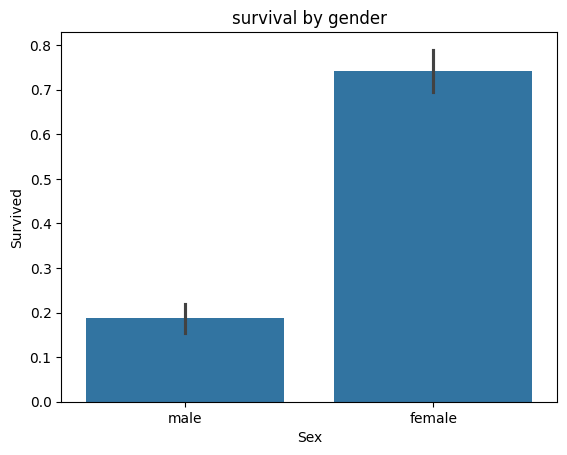

In [34]:
#Problem - 4:
# Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
# ization to show how the survival distributions vary by gender.
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
print(df.groupby('Sex')['Survived'].mean())
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("survival by gender")
plt.show()

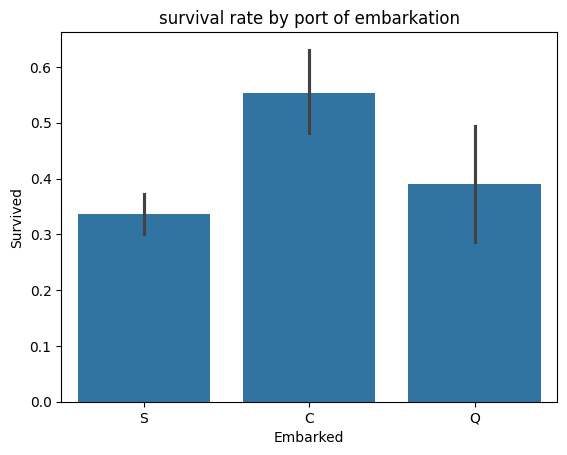

In [35]:
#Problem - 5:
# Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
# barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
df=pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
sns.barplot(x='Embarked',y='Survived',data=df)
plt.title("survival rate by port of embarkation")
plt.show()